In [96]:
import pandas as pd
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = 'plotly_white'

In [97]:
df_cdata = pd.read_csv ('control_group.csv', sep = ';')
df_tdata = pd.read_csv ('test_group.csv', sep = ';') 

# A/B Testing Information
In A/B testing, we compare the outcomes of two marketing techniques in order to select the best one for future marketing campaigns. For example, when I launched my first Instagram ad campaign to promote an Instagram post, my target audience was different from the target audience of my second ad campaign. After examining the outcomes of both ad campaigns, I always favored the second ad campaign's audience since it provided more reach and followers than the first.

This is what A/B testing entails. Your aim may be to increase sales, followers, or traffic, but choosing the optimal marketing approach based on the outcomes of prior marketing campaigns is nothing more than A/B testing.

# Data Story Intro

We will explore how a fictional e-commerce company, "TechWiz," used A/B testing to optimize their website and improve conversion rates. The primary goal of TechWiz was to increase the percentage of visitors who completed a purchase on their website. 

To achieve this:
1. They implemented A/B tests on various aspects of their site to identify the most effective strategies.
2. After the testing, which should be reached directly to the user, system and products seems user-friendly for clients.
3. The sales optimization, a success rate of 85% is achieved.

# Questions: 
1. What is the impact of the money spent on each campaign on the number of views received?
2. How do the number of searches and the received results in the Control Campaign compare to those in the Test Campaign?
3. What is the average Total Product Per Cart from the Control Campaign, and how does it compare to the average Total Product Per Cart from the Test Campaign?¶
4. What is the difference in the number of website clicks between the Test Campaign and the Control Campaign?
5. What was the percentage increase in spent money for the Test Campaign compared to the Control Campaign?
6. Is there a correlation between the number of website clicks and the viewed count in page generated by each campaign?

# Data Preperation

## Control group dataset

Let's consider the control group dataset as the first analysis group in the market. Dataset elements in this group enable market research as an experiment that reveals product expenditure and the effects of the product. The other data set with which we will compare this group data is the test group dataset. The most important conclusion to be drawn from comparing the two data sets is to search for the winning features between the two groups. And according to the result, it is to evaluate the most efficient investment tools.

**First 5 data.**

In [141]:
df_cdata.head()

,Campaign Name,Date,Total Spent,Count of Impressions,Reach,Click Count of Website,Searches and Received,Viewed Count in Page,Count of Cart Adding,Total Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,113430.0,91579.0,5224.0,2390.0,1984.0,1339.0,501.0


**Determine to our empty cells. Add more information or delete this data when you deep in to do dataset.**

**Now, lets double check last 5 variable in data set.**

In [142]:
df_cdata.tail()

,Campaign Name,Date,Total Spent,Count of Impressions,Reach,Click Count of Website,Searches and Received,Viewed Count in Page,Count of Cart Adding,Total Purchases
25,Control Campaign,26.08.2019,2233,124897.0,98432.0,5435.0,2847.0,2421.0,1448.0,251.0
26,Control Campaign,27.08.2019,2061,104678.0,91579.0,4941.0,3549.0,3249.0,980.0,605.0
27,Control Campaign,28.08.2019,2421,141654.0,125874.0,6287.0,1672.0,1589.0,1711.0,643.0
28,Control Campaign,29.08.2019,2375,92029.0,74192.0,8127.0,4891.0,4219.0,1486.0,334.0
29,Control Campaign,30.08.2019,2324,111306.0,88632.0,4658.0,1615.0,1249.0,442.0,670.0


**Take one more sample example to see column name** 

In [143]:
df_cdata.sample()

,Campaign Name,Date,Total Spent,Count of Impressions,Reach,Click Count of Website,Searches and Received,Viewed Count in Page,Count of Cart Adding,Total Purchases
15,Control Campaign,16.08.2019,2024,71274.0,42859.0,5224.0,2427.0,2158.0,1613.0,438.0


**Also see info() function to see all column name and data types.**

***There are little tiny problems in dataset which are empty cells.. We got date column is object thats why we imported date libs..***

In [144]:
df_cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Campaign Name           30 non-null     object 
 1   Date                    30 non-null     object 
 2   Total Spent             30 non-null     int64  
 3   Count of Impressions    30 non-null     float64
 4   Reach                   30 non-null     float64
 5   Click Count of Website  30 non-null     float64
 6   Searches and Received   30 non-null     float64
 7   Viewed Count in Page    30 non-null     float64
 8   Count of Cart Adding    30 non-null     float64
 9   Total Purchases         30 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


## Test Group dataset
Test group data allows us to consider the product's profit and loss transactions in the market.

In [145]:
df_tdata.head()

,Campaign Name,Date,Total Spent,Count of Impressions,Reach,Click Count of Website,Searches and Received,Viewed Count in Page,Count of Cart Adding,Total Purchases
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [146]:
df_tdata.tail()

,Campaign Name,Date,Total Spent,Count of Impressions,Reach,Click Count of Website,Searches and Received,Viewed Count in Page,Count of Cart Adding,Total Purchases
25,Test Campaign,26.08.2019,2311,80841,61589,3820,2037,1046,346,284
26,Test Campaign,27.08.2019,2915,111469,92159,6435,2976,2552,992,771
27,Test Campaign,28.08.2019,2247,54627,41267,8144,2432,1281,1009,721
28,Test Campaign,29.08.2019,2805,67444,43219,7651,1920,1240,1168,677
29,Test Campaign,30.08.2019,1977,120203,89380,4399,2978,1625,1034,572


In [147]:
df_tdata.sample()

,Campaign Name,Date,Total Spent,Count of Impressions,Reach,Click Count of Website,Searches and Received,Viewed Count in Page,Count of Cart Adding,Total Purchases
19,Test Campaign,20.08.2019,2712,39470,31893,6050,2061,1894,1047,730


In [148]:
df_tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Campaign Name           30 non-null     object
 1   Date                    30 non-null     object
 2   Total Spent             30 non-null     int64 
 3   Count of Impressions    30 non-null     int64 
 4   Reach                   30 non-null     int64 
 5   Click Count of Website  30 non-null     int64 
 6   Searches and Received   30 non-null     int64 
 7   Viewed Count in Page    30 non-null     int64 
 8   Count of Cart Adding    30 non-null     int64 
 9   Total Purchases         30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


**The data looks throughly clean already!** 

***It looks there is no empty cell.***

In [149]:
df_cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Campaign Name           30 non-null     object 
 1   Date                    30 non-null     object 
 2   Total Spent             30 non-null     int64  
 3   Count of Impressions    30 non-null     float64
 4   Reach                   30 non-null     float64
 5   Click Count of Website  30 non-null     float64
 6   Searches and Received   30 non-null     float64
 7   Viewed Count in Page    30 non-null     float64
 8   Count of Cart Adding    30 non-null     float64
 9   Total Purchases         30 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


**Lets do both dataset same column name. It will be cleaner to see second or third clients.** 

**Lets prepare Data before our analyze.**

In [150]:
df_cdata.columns = ['Campaign Name', 'Date', 'Total Spent',
                   'Count of Impressions', 'Reach', 'Click Count of Website',
                   'Searches and Received', 'Viewed Count in Page', 'Count of Cart Adding',
                   'Total Purchases']
df_tdata.columns = ['Campaign Name', 'Date', 'Total Spent',
                   'Count of Impressions', 'Reach', 'Click Count of Website',
                   'Searches and Received', 'Viewed Count in Page', 'Count of Cart Adding',
                   'Total Purchases']

In [151]:
df_cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Campaign Name           30 non-null     object 
 1   Date                    30 non-null     object 
 2   Total Spent             30 non-null     int64  
 3   Count of Impressions    30 non-null     float64
 4   Reach                   30 non-null     float64
 5   Click Count of Website  30 non-null     float64
 6   Searches and Received   30 non-null     float64
 7   Viewed Count in Page    30 non-null     float64
 8   Count of Cart Adding    30 non-null     float64
 9   Total Purchases         30 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [152]:
df_tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Campaign Name           30 non-null     object
 1   Date                    30 non-null     object
 2   Total Spent             30 non-null     int64 
 3   Count of Impressions    30 non-null     int64 
 4   Reach                   30 non-null     int64 
 5   Click Count of Website  30 non-null     int64 
 6   Searches and Received   30 non-null     int64 
 7   Viewed Count in Page    30 non-null     int64 
 8   Count of Cart Adding    30 non-null     int64 
 9   Total Purchases         30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


**Drop empty cells. To see best results.**

There are afew empty cells in control group dataset. Let's drop get rid of cells with usefull data.

In [153]:
df_cdata.isnull().sum()

Campaign Name             0
Date                      0
Total Spent               0
Count of Impressions      0
Reach                     0
Click Count of Website    0
Searches and Received     0
Viewed Count in Page      0
Count of Cart Adding      0
Total Purchases           0
dtype: int64

In [154]:
df_cdata['Count of Impressions'].fillna(value = df_cdata['Count of Impressions'].median(), 
                                        inplace = True)
df_cdata['Reach'].fillna(value = df_cdata['Reach'].median(), 
                         inplace = True)
df_cdata['Click Count of Website'].fillna(value = df_cdata['Click Count of Website'].median(), 
                                          inplace = True)
df_cdata['Searches and Received'].fillna(value = df_cdata['Searches and Received'].median(),
                                        inplace = True)
df_cdata['Viewed Count in Page'].fillna(value = df_cdata['Viewed Count in Page'].median(),
                                        inplace = True)
df_cdata['Count of Cart Adding'].fillna(value= df_cdata['Count of Cart Adding'].median(),
                                       inplace = True)
df_cdata['Total Purchases'].fillna(value = df_cdata['Total Purchases'].median(),
                                   inplace = True)

***Fill fully data median value in empty cells.***

## Merge both dataset in a file. 

In [155]:
test_data = df_cdata.merge(df_tdata,
                          how = 'outer').sort_values(['Total Spent'])
test_data = test_data.reset_index(drop = True)
test_data.head()

,Campaign Name,Date,Total Spent,Count of Impressions,Reach,Click Count of Website,Searches and Received,Viewed Count in Page,Count of Cart Adding,Total Purchases
0,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
1,Control Campaign,21.08.2019,1803,74654.0,59873.0,5691.0,2711.0,2496.0,1460.0,800.0
2,Control Campaign,5.08.2019,1835,113430.0,91579.0,5224.0,2390.0,1984.0,1339.0,501.0
3,Control Campaign,14.08.2019,1875,145248.0,118632.0,4521.0,1209.0,1149.0,1339.0,788.0
4,Control Campaign,18.08.2019,1876,108452.0,96518.0,7253.0,2447.0,2115.0,1695.0,243.0


**Order by Total spent to lowest to highest value in new dataset file**

In [156]:
test_data['Campaign Name'].value_counts()

Control Campaign    30
Test Campaign       30
Name: Campaign Name, dtype: int64

In [157]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Campaign Name           60 non-null     object 
 1   Date                    60 non-null     object 
 2   Total Spent             60 non-null     int64  
 3   Count of Impressions    60 non-null     float64
 4   Reach                   60 non-null     float64
 5   Click Count of Website  60 non-null     float64
 6   Searches and Received   60 non-null     float64
 7   Viewed Count in Page    60 non-null     float64
 8   Count of Cart Adding    60 non-null     float64
 9   Total Purchases         60 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.8+ KB


**Double check equal of numbers of samples in the campaing name attributes** 

# A/B Testing Questions

## 1. What is the impact of the money spent on each campaign on the number of views received?

To begin A/B testing, I will first examine the link between the number of viewed in first page we received from each campaign and the money spent on each campaign.
According to the amount spent on both efforts, the control campaign generated more viewed count. 

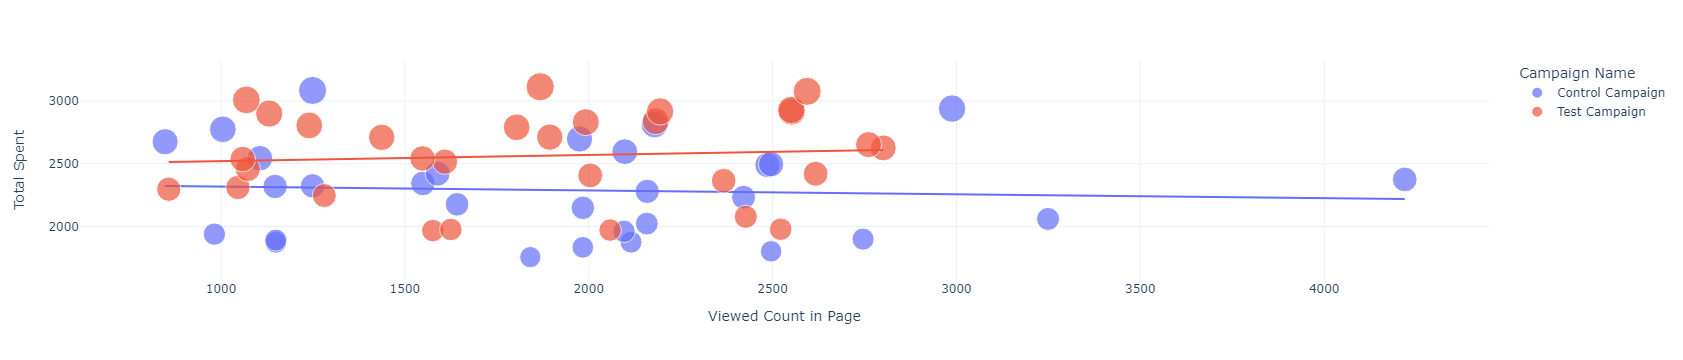

In [158]:
graph_1 = px.scatter(data_frame = test_data,
                    x = 'Viewed Count in Page',
                    y = 'Total Spent',
                    size = 'Total Spent',
                    color = 'Campaign Name',
                    trendline = 'ols')
graph_1.show()

Let's have a look at the number of searches conducted on the website as a result of both campaigns.

## 2. How do the number of searches and the received results in the Control Campaign compare to those in the Test Campaign?
When we do our searches and received on random customers, we see that the search rate is 72,569 and we see 52.1% of the total search rates. However, when we conduct the product search on the determined customer base, we see the product as 66,808, with a total search rate of 47.9%. After the test phase of the products, winner is Test Campaign. We can base on test campaign steps to be succeed in market. 

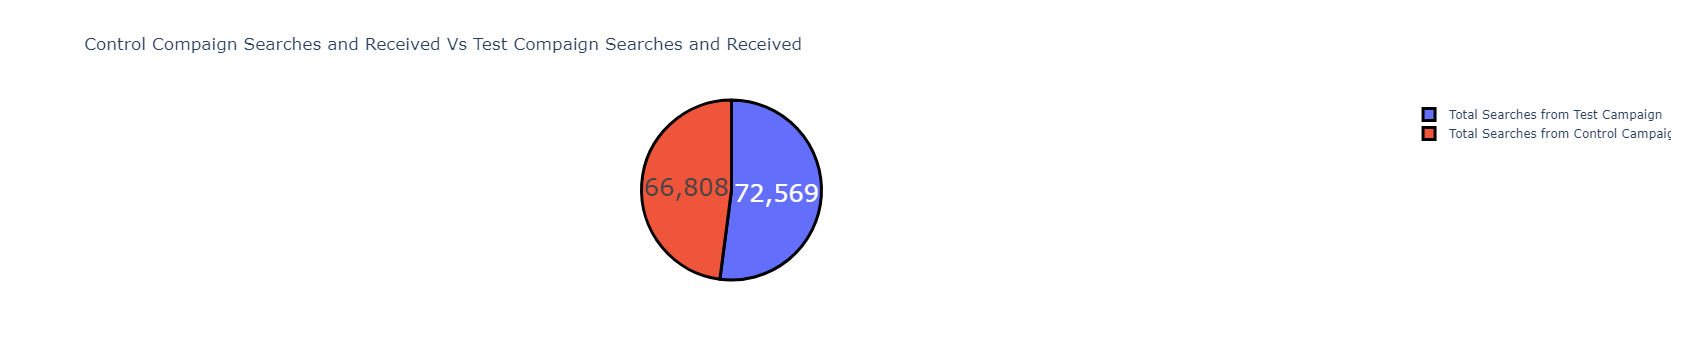

In [159]:
label = ['Total Searches from Control Campaign',
        'Total Searches from Test Campaign']
total_received=[sum(df_cdata['Searches and Received']),
                sum(df_tdata['Searches and Received'])]

color = ['lightpurple','lightred']
graph_2 = go.Figure(data=[go.Pie(labels= label, values= total_received)])
graph_2.update_layout(title_text = 'Control Compaign Searches and Received Vs Test Compaign Searches and Received')
graph_2.update_traces(hoverinfo='label+percent', textinfo='value', 
                textfont_size=24,
                marker=dict(colors=color, 
                line=dict(color='black', width=3)))
graph_2.show()

## 3. What is the average Total Product Per Cart from the Control Campaign, and how does it compare to the average Total Product Per Cart from the Test Campaign?


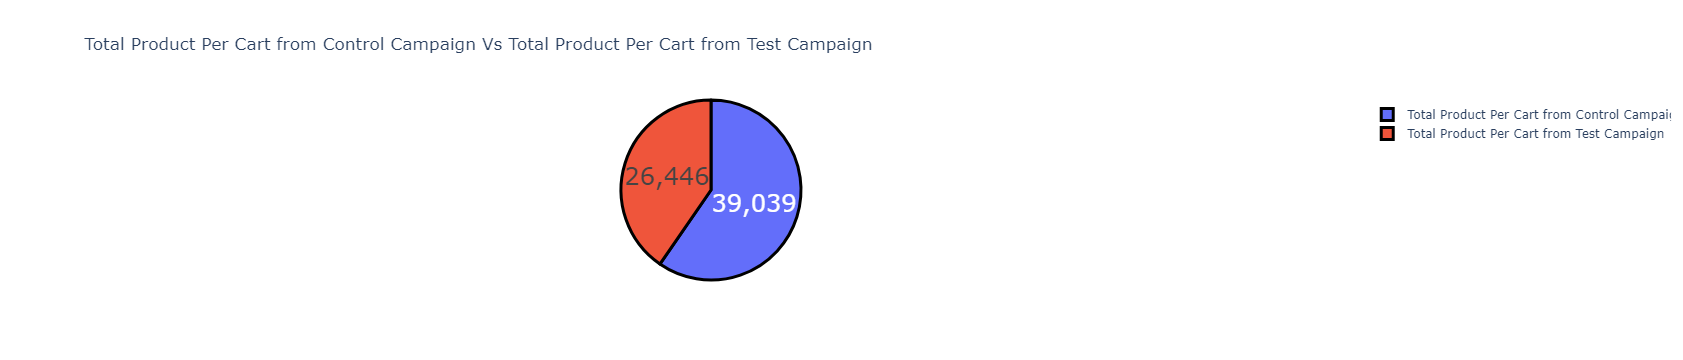

In [160]:
label = ['Total Product Per Cart from Control Campaign',
        'Total Product Per Cart from Test Campaign']
total_product = [sum(df_cdata['Count of Cart Adding']),
                 sum(df_tdata['Count of Cart Adding'])]

color = ['lightpurple','lightred']
graph_3 = go.Figure(data=[go.Pie(labels= label, values= total_product)])
graph_3.update_layout(title_text = 'Total Product Per Cart from Control Campaign Vs Total Product Per Cart from Test Campaign')
graph_3.update_traces(hoverinfo='label+percent', textinfo='value', 
                textfont_size = 24,
                marker=dict(colors = color, 
                line=dict(color='black', width=3)))
graph_3.show()

## 4. What is the difference in the number of website clicks between the Test Campaign and the Control Campaign?

The Test Campaign received a significantly higher number of Website Clicks, with a count of 180,960, compared to the Control Campaign, which received 159,527 Website Clicks. This indicates that the Test Campaign attracted more traffic and user engagement on the website.


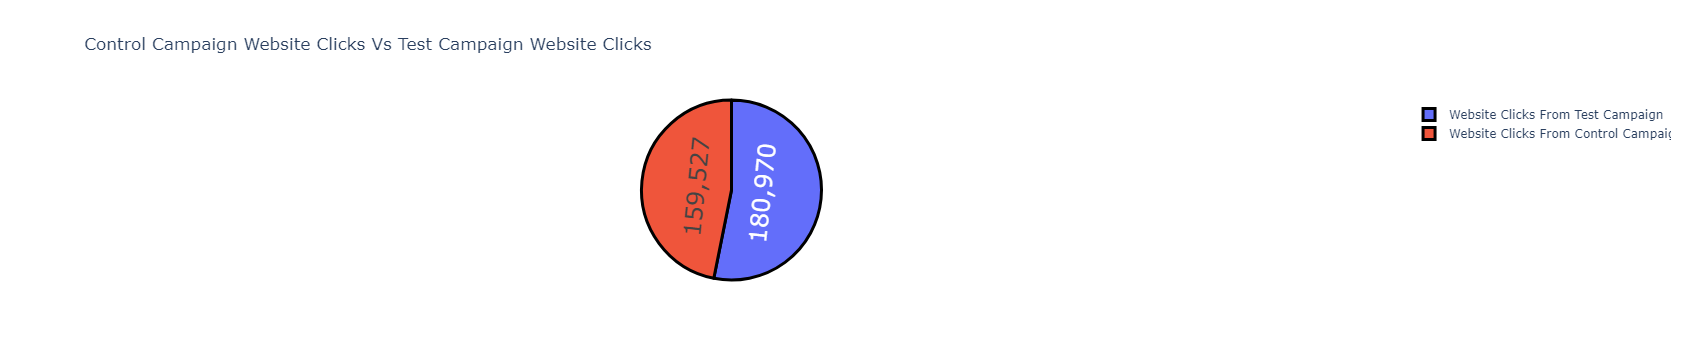

In [161]:
label = ['Website Clicks From Control Campaign',
        'Website Clicks From Test Campaign']
total_clicks = [sum (df_cdata['Click Count of Website']),
               sum (df_tdata['Click Count of Website'])]
color = ['lightpurple','lightred']
graph_4 = go.Figure(data = [go.Pie(labels = label, values = total_clicks)])
graph_4.update_layout(title_text= 'Control Campaign Website Clicks Vs Test Campaign Website Clicks')
graph_4.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=24,
                  marker=dict(colors=color, 
                              line=dict(color='black', width=3)))
graph_4.show()

## 5. What was the percentage increase in spent money for the Test Campaign compared to the Control Campaign?
The Test Campaign generated a significantly higher Total Amount of 76,892 compared to the Control Campaign, which resulted in a Total Amount of 68,653. This suggests that the Test Campaign was more successful in driving revenue and sales. Test Campaign is winner. 


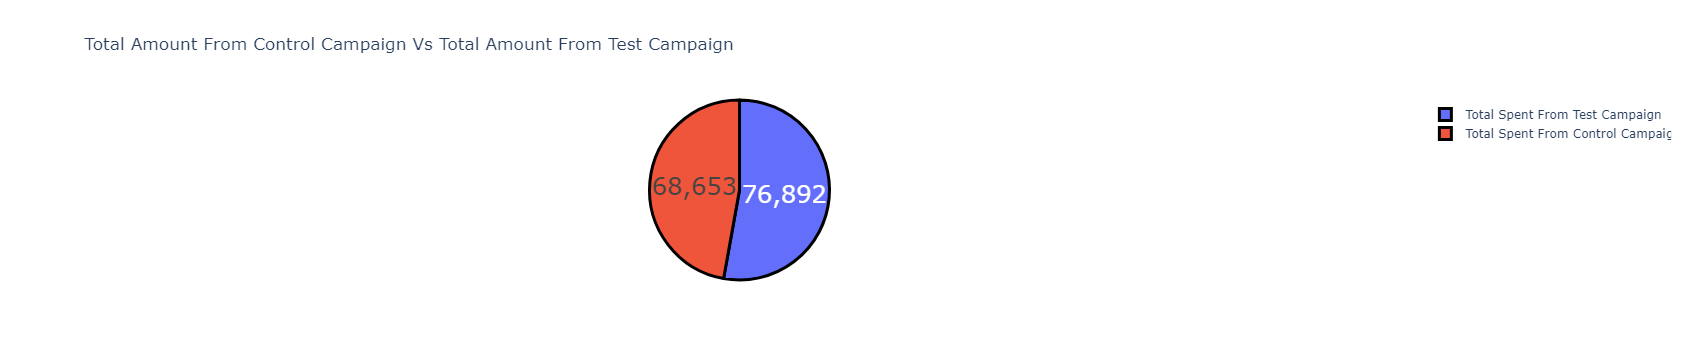

In [162]:
label = ['Total Spent From Control Campaign',
        'Total Spent From Test Campaign']
total_spent = [sum(df_cdata['Total Spent']),
              sum(df_tdata['Total Spent'])]
color = ['lightpurple', 'lightred']
graph_5 = go.Figure(data=[go.Pie(labels = label, values = total_spent)])
graph_5.update_layout(title_text = 'Total Amount From Control Campaign Vs Total Amount From Test Campaign')
graph_5.update_traces(hoverinfo='label+percent', textinfo='value', 
                textfont_size=24,
                marker=dict(colors=color, 
                line=dict(color='black', width=3)))

graph_5.show()

## 6. Is there a correlation between the number of website clicks and the viewed count in page generated by each campaign?



The website clicks are higher in the test campaign, but the engagement from website clicks is higher in the control campaign. It shows that The control campaign winner!



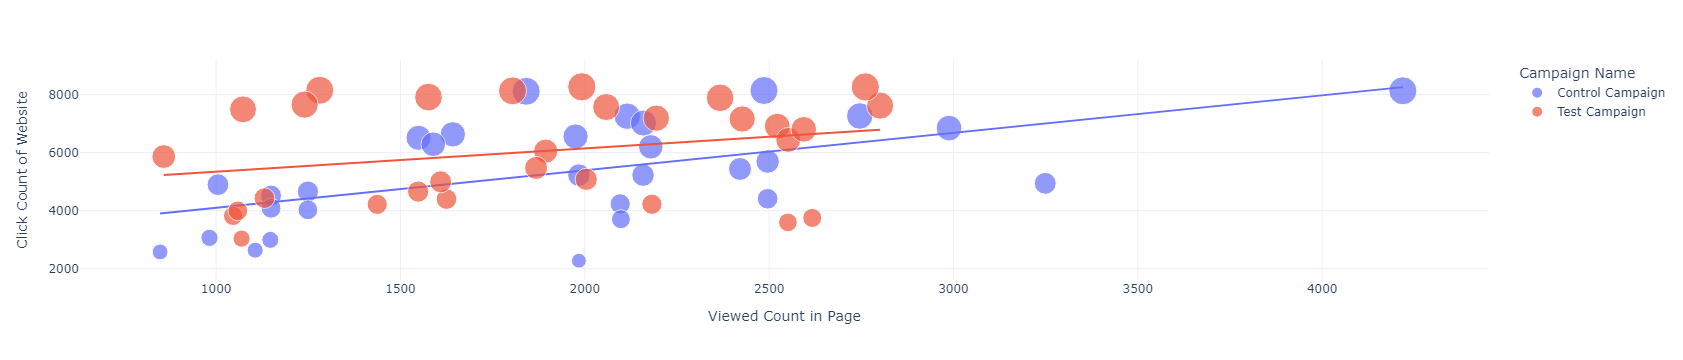

In [163]:
graph_6 = px.scatter(data_frame = test_data,
                    x = 'Viewed Count in Page',
                    y = 'Click Count of Website',
                    size = 'Click Count of Website',
                    color = 'Campaign Name',
                    trendline = 'ols')
graph_6.show()

# Conclusion
According to the results of the preceding A/B testing, the control campaign resulted in increased sales and visitor engagement. The control campaign resulted in more product views, more goods in the basket, and more purchases. However, in the test campaign, the discussion rate of goods in the basket is greater. According on the goods seen and added to the cart, the test campaign resulted in increased sales. Furthermore, the control campaign increases total sales. As a result, the Test campaign may be used to promote a single product to a specific audience, but the Control campaign can be used to market many items to a larger audience.